In [17]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

In [18]:
def generating_random_numbers(curr, n):
    """
    generate 3 unique random numbers in range [0, n]
    """
    iter_x1 = random.randint(0, n)
    iter_x2 = random.randint(0, n)
    iter_x3 = random.randint(0, n)
    while iter_x1 == curr: 
        iter_x1 = random.randint(0, n)
    while iter_x2 == curr or iter_x2 == iter_x1: 
        iter_x2 = random.randint(0, n)  
    while iter_x3 == curr or iter_x3 == iter_x1 or iter_x3 == iter_x2:  
        iter_x3 = random.randint(0, n) 
    return iter_x1, iter_x2, iter_x3

In [19]:
def evolve(curr, 
           population, 
           dim_func, 
           func, 
           F, 
           probability_mutation, 
           size_population):
    """
    c = x1 + F * (x2 - x3)
    """
    # generating x1, x2, x3
    i1, i2, i3 = generating_random_numbers(curr, size_population - 1)
    x1, x2, x3 = population[i1], population[i2], population[i3]
    # start generating child
    pre_child = x1 + F * (x2 - x3)
    parent = population[curr]
    child = parent.copy()
    # crossing        
    coins = sps.bernoulli(probability_mutation).rvs(dim_func)
    for i in range(dim_func):
        if coins[i] == 1:
            child[i] = pre_child[i] 
    # selection  
    if (func(child) < func(parent)): 
        return child
    return parent         

In [20]:
def differential_evolution(
    dim_func,
    func,
    F=0.4, 
    probability_mutation=0.8,    
    size_population=None,
    distribution=sps.norm(0, 1),
    count_iterations=100
    ):
    """
    dim_func - number of variables in function
    func - lambda of function which want to optimize
    F - power of evolution, best F in [0.4, 1.0]
    probability_mutation - with this probability try to crossing child with parent
    size_population - best size is n in [5 * dim_func, 10 * dim_func]
    distribution - start population distribution
    """
    if size_population is None:
        size_population = dim_func * 5        
    population = distribution.rvs(size=(size_population, dim_func))
    old_f = func(population.T)
    list_f = []
    for iteration in range(count_iterations): 
        # evolve all
        new_population = (np.array(
             [evolve(i, population, dim_func, func, F, probability_mutation, size_population)
             for i in range(size_population)])
            ).T
        
        # calc func
        old_f = func(new_population)
        population = new_population.T 
        list_f.append(np.min(old_f))
    return old_f, np.array(list_f)
    

In [21]:
test_func = lambda x: 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

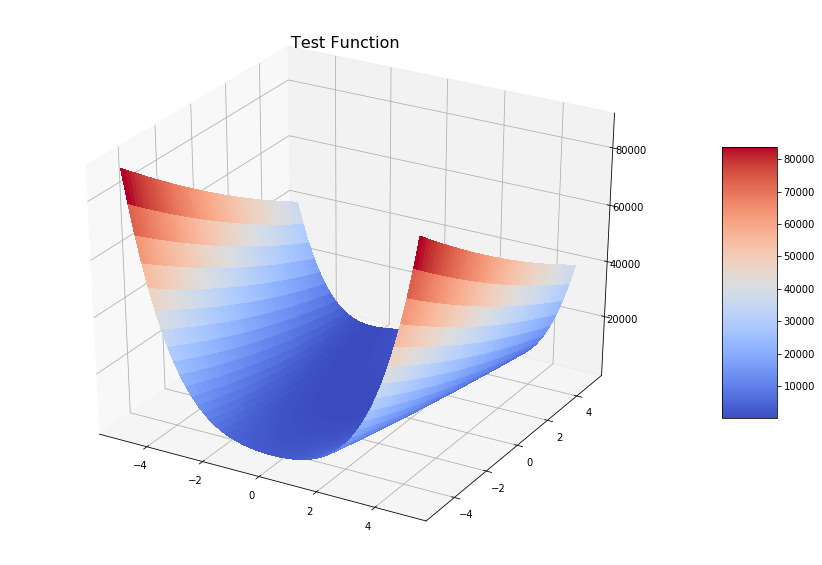

In [22]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(-5, 5, 1000)
Y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(X, Y)
Z = test_func((X,Y))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Test Function", fontsize = 16)
plt.show()

minimum  2.1559271933521723e-13
CPU times: user 1.15 s, sys: 29.8 ms, total: 1.18 s
Wall time: 1.5 s


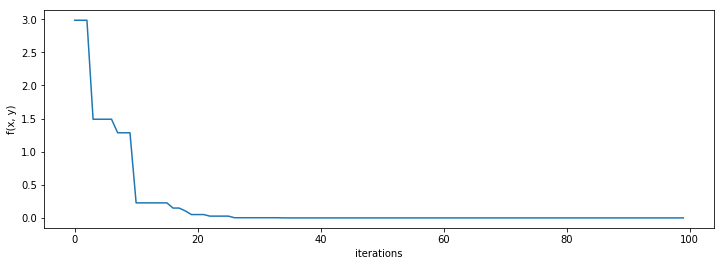

In [23]:
%%time
ff, f_list = differential_evolution(dim_func=2,
                            func=test_func,
                            F=0.7, 
                            probability_mutation=0.9,
                            count_iterations=100)
print('minimum ', np.min(ff))

plt.figure(figsize=(12,4))
plt.plot(np.arange(f_list.size), f_list)
plt.xlabel("iterations")
plt.ylabel("f(x, y)")

In [97]:
my_functions = [(2, lambda x: 100*(x[1]- x[0]**2)**2 + (1 - x[0])**2),
             (3, lambda x: (x[1] + x[0] + x[2])**2 + (2 - x[1] - x[0] - x[2])**2),
             (2, lambda x: (x[0] - x[1] + x[0])**2)]

minimum  0.01324483159820971
minimum  2.0000000000804827
minimum  1.7360123087041306e-11


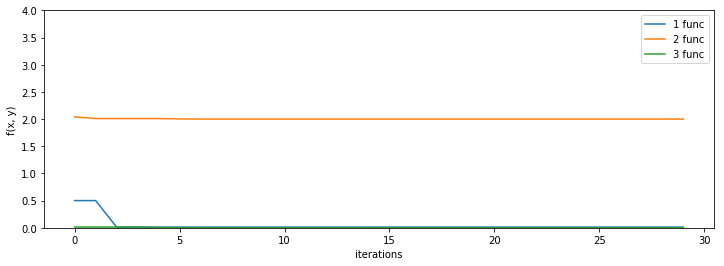

In [96]:
plt.figure(figsize=(12,4))
plt.subplot
for i, (dim, func) in enumerate(my_functions):
    ff, f_list = differential_evolution(dim_func=dim,
                            func=func,
                            F=0.9, 
                            probability_mutation=0.9,
                            count_iterations=30)
    print('minimum ', np.min(ff))
    plt.plot(np.arange(f_list.size), f_list, label=str(i+1)+' func')
    
plt.ylim((0, 4))    
plt.xlabel("iterations")
plt.ylabel("f(x, y)") 
plt.legend()

In [212]:
def ackley(argument):
    x1, x2 = argument
    a = 20
    b = 0.2
    c = 2*np.pi
    
    sum1 = x1**2 + x2**2 
    sum2 = np.cos(c*x1) + np.cos(c*x2)
    
    term1 = - a * np.exp(-b * ((1/2.) * sum1**(0.5)))
    term2 = - np.exp((1/2.)*sum2)

    return term1 + term2 + a + np.exp(1)

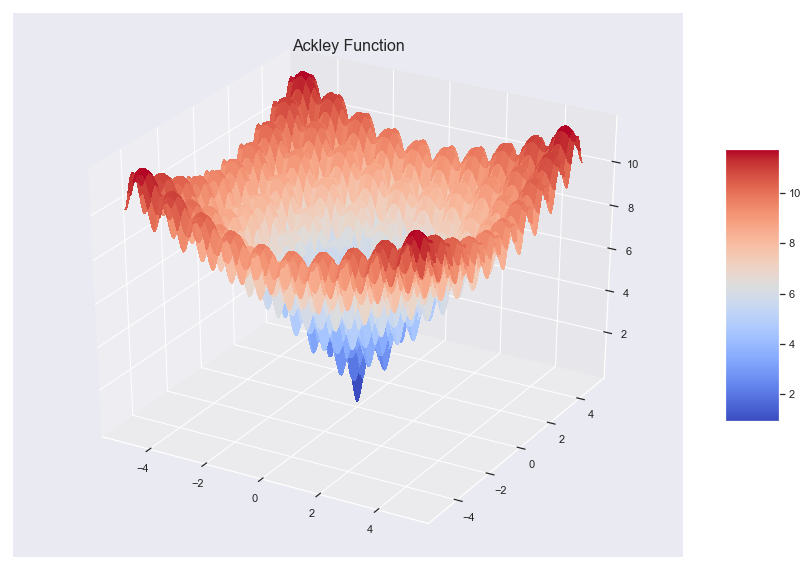

In [213]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(-5, 5, 1000)
Y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(X, Y)
Z = ackley((X, Y))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Ackley Function", fontsize = 16)
fig.savefig('ackley.png')
plt.show()

minimum  0.001454987316563905


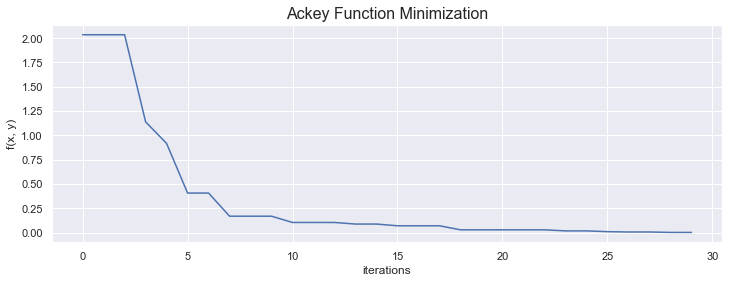

CPU times: user 383 ms, sys: 10 ms, total: 393 ms
Wall time: 392 ms


In [218]:
%%time
ff, f_list = differential_evolution(dim_func=2,
                            func=ackley,
                            F=0.7, 
                            probability_mutation=0.9,
                            count_iterations=30)
print('minimum ', np.min(ff))

plt.figure(figsize=(12,4))
plt.plot(np.arange(f_list.size), f_list)
plt.xlabel("iterations")
plt.ylabel("f(x, y)")
plt.title("Ackey Function Minimization", fontsize = 16)
plt.savefig('ackley_convergence.png')
plt.show()

In [163]:
%%time 

from tqdm import tqdm_notebook

mins = []

for evolution_power in tqdm_notebook(np.arange(0.1, 2.1, 0.1)):
    tmp = []
    for probability_mutation in np.arange(0.05, 1.05, 0.05):
        ff, f_list = differential_evolution(dim_func=2,
                                            func=ackley,
                                            F=evolution_power, 
                                            probability_mutation=probability_mutation,
                                            count_iterations=50)
        tmp.append(np.min(ff))
    mins.append(np.array(tmp))

mins = np.array(mins)

CPU times: user 2min 34s, sys: 1.85 s, total: 2min 36s
Wall time: 2min 42s


In [42]:
evolution_labels = []
probability_labels = []
for evolution_power in np.arange(0.1, 2.1, 0.1):
     evolution_labels.append(round(evolution_power, 1))
for probability_mutation in np.arange(0.05, 1.05, 0.05):
    probability_labels.append(round(probability_mutation, 2))

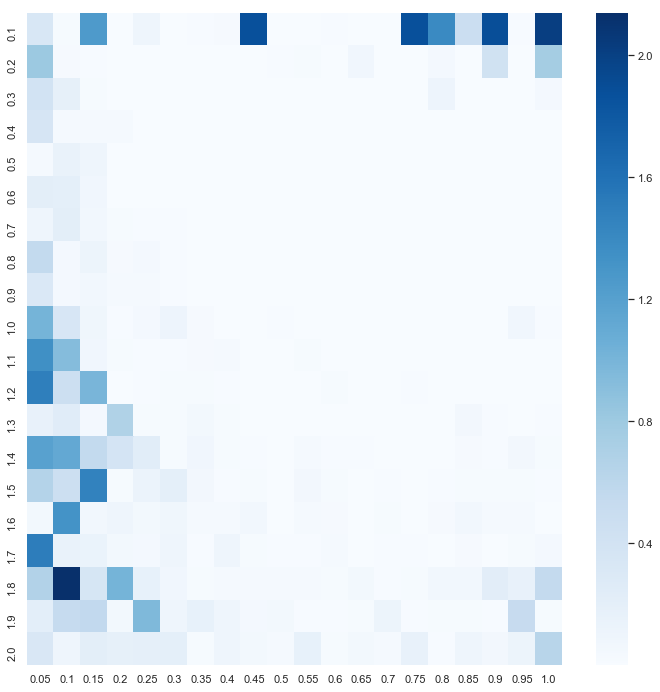

In [183]:
import seaborn as sns 
sns.set()

plt.figure(figsize=(12,12))
ax = sns.heatmap(mins, cmap="Blues")
ax.set_xticklabels(probability_labels)
ax.set_yticklabels(evolution_labels)
plt.savefig('ackley_heatmap.png')
plt.show()

In [205]:
def bartels_conn(argument):
    x, y = argument
    return abs(x**2 + y**2 + x*y) + abs(np.sin(x)) + abs(np.cos(x))

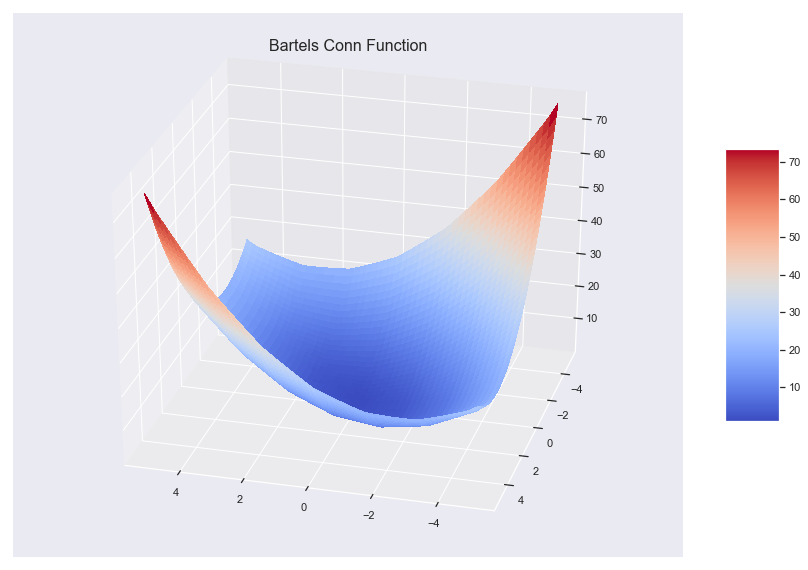

In [206]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(-5, 5, 1000)
Y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(X, Y)
Z = bartels_conn((X, Y))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 105)


plt.title("Bartels Conn Function", fontsize = 16)
fig.savefig('bartels_conn_plot.png')
plt.show()

minimum  1.002975482158698


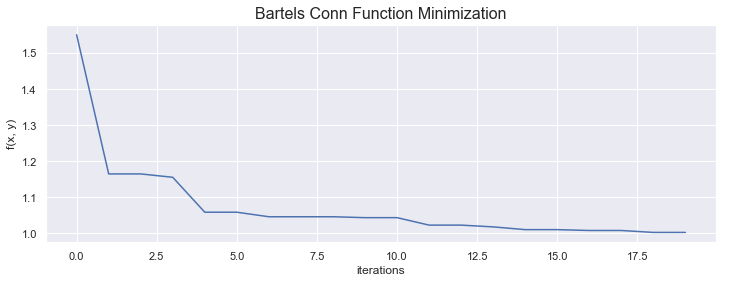

CPU times: user 322 ms, sys: 14.8 ms, total: 337 ms
Wall time: 336 ms


In [211]:
%%time
ff, f_list = differential_evolution(dim_func=2,
                            func=bartels_conn,
                            F=0.7, 
                            probability_mutation=0.9,
                            count_iterations=20)
print('minimum ', np.min(ff))

plt.figure(figsize=(12,4))
plt.plot(np.arange(f_list.size), f_list)
plt.xlabel("iterations")
plt.ylabel("f(x, y)")
plt.title("Bartels Conn Function Minimization", fontsize = 16)
plt.savefig('bartels_conn_convergence.png')
plt.show()

In [202]:
%%time 

from tqdm import tqdm_notebook

mins = []

for evolution_power in tqdm_notebook(np.arange(0.1, 2.1, 0.1)):
    tmp = []
    for probability_mutation in np.arange(0.05, 1.05, 0.05):
        ff, f_list = differential_evolution(dim_func=2,
                                            func=bartels_conn,
                                            F=evolution_power, 
                                            probability_mutation=probability_mutation,
                                            count_iterations=50)
        tmp.append(np.min(ff))
    mins.append(np.array(tmp))

mins = np.array(mins)

CPU times: user 2min 36s, sys: 1.68 s, total: 2min 37s
Wall time: 2min 47s


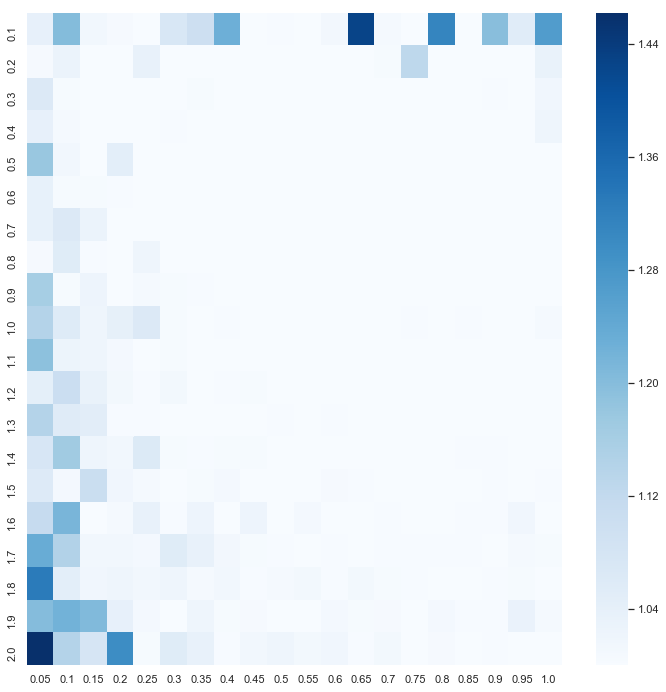

In [203]:
import seaborn as sns 
sns.set()

plt.figure(figsize=(12,12))
ax = sns.heatmap(mins, cmap="Blues")
ax.set_xticklabels(probability_labels)
ax.set_yticklabels(evolution_labels)
plt.savefig('bartels_conn_heatmap.png')
plt.show()

In [12]:
def xin_she_yang(argument):
    x, y = argument
    return random.uniform(0, 1) * abs(x) + random.uniform(0, 1) * abs(y)**2

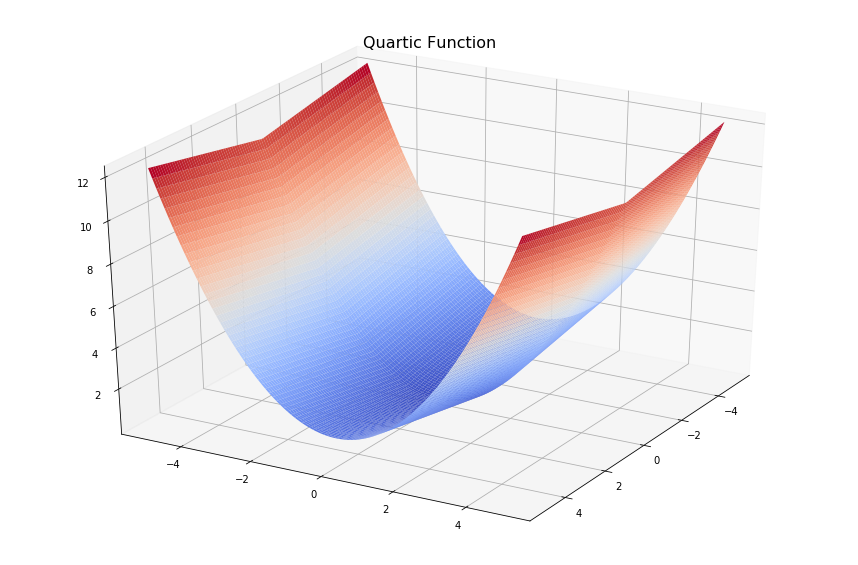

In [15]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = xin_she_yang((X, Y))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, rcount=500, ccount=500)

# Add a color bar which maps values to colors.
ax.view_init(30, 30)


plt.title("Xin-She Yang Function", fontsize = 16)
fig.savefig('xin_she_yang_plot.png')
plt.show()

minimum  0.001151914348858493


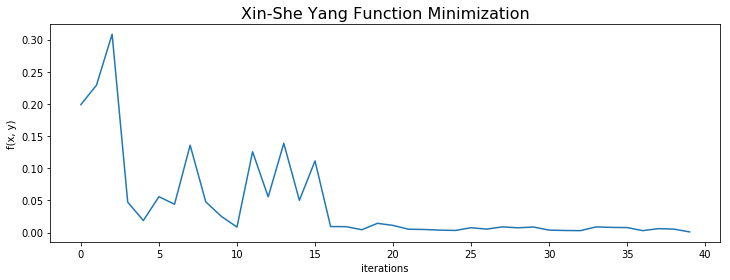

CPU times: user 496 ms, sys: 17 ms, total: 514 ms
Wall time: 526 ms


In [39]:
%%time
ff, f_list = differential_evolution(dim_func=2,
                            func=xin_she_yang,
                            F=0.7, 
                            probability_mutation=0.9,
                            count_iterations=40)
print('minimum ', np.min(ff))

plt.figure(figsize=(12,4))
plt.plot(np.arange(f_list.size), f_list)
plt.xlabel("iterations")
plt.ylabel("f(x, y)")
plt.title("Xin-She Yang Function Minimization", fontsize = 16)
plt.savefig('xin_she_yang_convergence.png')
plt.show()

In [40]:
%%time 

from tqdm import tqdm_notebook

mins = []

for evolution_power in tqdm_notebook(np.arange(0.1, 2.1, 0.1)):
    tmp = []
    for probability_mutation in np.arange(0.05, 1.05, 0.05):
        ff, f_list = differential_evolution(dim_func=2,
                                            func=xin_she_yang,
                                            F=evolution_power, 
                                            probability_mutation=probability_mutation,
                                            count_iterations=50)
        tmp.append(np.min(ff))
    mins.append(np.array(tmp))

mins = np.array(mins)


CPU times: user 2min 47s, sys: 2.4 s, total: 2min 50s
Wall time: 3min 9s


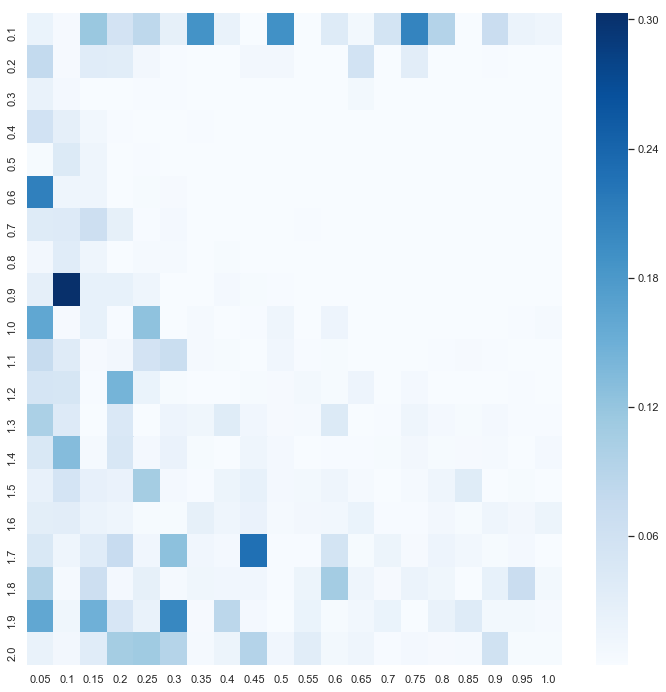

In [43]:
import seaborn as sns 
sns.set()

plt.figure(figsize=(12,12))
ax = sns.heatmap(mins, cmap="Blues")
ax.set_xticklabels(probability_labels)
ax.set_yticklabels(evolution_labels)
plt.savefig('xin_she_yang_heatmap.png')
plt.show()